<a href="https://colab.research.google.com/github/sruthireddy1482/CE888/blob/main/LAB7/Exercise_1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [ ]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


#### compile and fit model 

In [ ]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 36s 5ms/step - loss: 0.4542 - accuracy: 0.8537 - val_loss: 0.0627 - val_accuracy: 0.9812
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0564 - accuracy: 0.9831 - val_loss: 0.0371 - val_accuracy: 0.9890
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0356 - accuracy: 0.9902 - val_loss: 0.0515 - val_accuracy: 0.9859
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0251 - accuracy: 0.9927 - val_loss: 0.0354 - val_accuracy: 0.9905
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0179 - accuracy: 0.9940 - val_loss: 0.0315 - val_accuracy: 0.9913


#### evaluate model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0294 - accuracy: 0.9906


0.9905999898910522

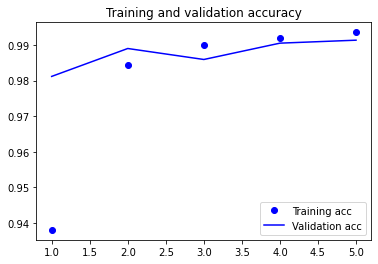

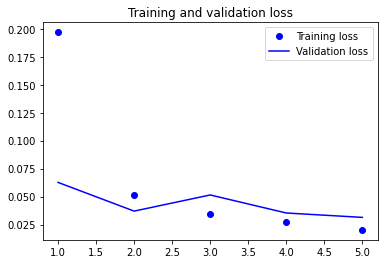

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [ ]:
# Write code here

In [92]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
  model1 = Sequential()
  model1.add(layers.Conv2D(32, (3, 3), activation='elu', input_shape=(28, 28, 1)))
  model1.add(layers.MaxPooling2D((2, 2)))
  model1.add(layers.Conv2D(64, (3, 3), activation='elu'))
  model1.add(layers.MaxPooling2D((2, 2)))
  model1.add(layers.Conv2D(64, (3, 3), activation='elu'))
  model1.add(layers.Flatten())
  model1.add(layers.Dense(64, activation='elu'))
  model1.add(layers.Dense(10, activation='softmax'))
  model1.compile( 
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )    
  return model1
cnn=create_model()
cnn.compile(
  optimizer='adam',
  loss='categorical_crossentropy',  
  metrics=['accuracy'],
)
cnn.summary()


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_20 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 64)              

In [93]:
# fix random seed for reproducibility
import numpy as np
seed = 7
np.random.seed(seed)
# load dataset
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [94]:
history = cnn.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 0.4060 - accuracy: 0.8729 - val_loss: 0.0647 - val_accuracy: 0.9794
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0531 - accuracy: 0.9827 - val_loss: 0.0491 - val_accuracy: 0.9852
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0374 - accuracy: 0.9885 - val_loss: 0.0491 - val_accuracy: 0.9862
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0287 - accuracy: 0.9917 - val_loss: 0.0603 - val_accuracy: 0.9836
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0218 - accuracy: 0.9927 - val_loss: 0.0450 - val_accuracy: 0.9890


In [95]:
# create model
mdl = KerasClassifier(build_fn=create_model, verbose=1)
# define parameters and values for grid search 
param_grid = {
    'batch_size': [25,32],
    'optimizer': ['SGD', 'Adagrad'],    
    'epochs': [5,10]
}

In [96]:
grid = GridSearchCV(estimator=mdl, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_images,train_labels)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.7614 - accuracy: 0.7736
Epoch 2/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.1173 - accuracy: 0.9643
Epoch 3/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0743 - accuracy: 0.9766
Epoch 4/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0584 - accuracy: 0.9820
Epoch 5/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0520 - accuracy: 0.9840
Epoch 6/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0426 - accuracy: 0.9869
Epoch 7/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0389 - accuracy: 0.9883
Epoch 8/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0331 - accuracy: 0.9896
Epoch 9/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0303 - accuracy: 0.9908
Epoch 10/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.026

In [97]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.984283 using {'batch_size': 25, 'epochs': 10, 'optimizer': 'SGD'}
0.979683 (0.000554) with: {'batch_size': 25, 'epochs': 5, 'optimizer': 'SGD'}
0.933900 (0.001366) with: {'batch_size': 25, 'epochs': 5, 'optimizer': 'Adagrad'}
0.984283 (0.000826) with: {'batch_size': 25, 'epochs': 10, 'optimizer': 'SGD'}
0.953167 (0.001829) with: {'batch_size': 25, 'epochs': 10, 'optimizer': 'Adagrad'}
0.975483 (0.001397) with: {'batch_size': 32, 'epochs': 5, 'optimizer': 'SGD'}
0.929067 (0.001782) with: {'batch_size': 32, 'epochs': 5, 'optimizer': 'Adagrad'}
0.982800 (0.000708) with: {'batch_size': 32, 'epochs': 10, 'optimizer': 'SGD'}
0.950317 (0.001161) with: {'batch_size': 32, 'epochs': 10, 'optimizer': 'Adagrad'}
